In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 4 code

## Part a

In [84]:
def resistant(n_0, alpha_g, generations, return_type='last'):
    
    if return_type not in ['last', 'all']:
        raise ValueError('return_type must be \'last\' or \'all\'')
    
    n_regular = n_0
    n_mutated = 0
    
    mutated = np.zeros(generations + 1).astype(int)
    
    for gen in range(1, generations + 1):
        n_tot = 2**gen * n_0
        n_mutants_from_prev_gen = 2 * mutated[gen - 1]
        n_new_candidates = n_tot - n_mutants_from_prev_gen
        n_mutants_from_this_gen = np.random.binomial(n_new_candidates, alpha_g)
        n_mutants = n_mutants_from_prev_gen + n_mutants_from_this_gen
        mutated[gen] = n_mutants
    
    if return_type == 'last':
        return mutated[-1]
    else:
        return mutated

def resistant_with_first_gen(n_0, alpha_g, generations):
        
    first_gen = generations + 1
    
    n_regular = n_0
    n_mutated = 0
    
    mutated = np.zeros(generations + 1).astype(int)
    
    for gen in range(1, generations + 1):
        n_tot = 2**gen * n_0
        n_mutants_from_prev_gen = 2 * mutated[gen - 1]
        n_new_candidates = n_tot - n_mutants_from_prev_gen
        n_mutants_from_this_gen = np.random.binomial(n_new_candidates, alpha_g)
        n_mutants = n_mutants_from_prev_gen + n_mutants_from_this_gen
        mutated[gen] = n_mutants
        if mutated[gen] > mutated[gen - 1] and first_gen == generations + 1:
            first_gen = gen
    
    return first_gen, mutated[-1]

In [37]:
test = resistant(100, .1, 5)
print(np.array([100 * 2**item for item in range(6)]))
print(test)

[ 100  200  400  800 1600 3200]
1279


In [14]:
test = [item for item in range(3)]
print(test[-1])

2


In [9]:
print([item for item in range(1, 2)])

[1]


## Part b

In [62]:
C = 500
n_0 = 200
alpha_g = 2.0 * 10 ** -9.0
g = 21

m_values = 0 * np.arange(1, C + 1)

for sample in range(C):
    m_values[sample] = resistant(200, alpha_g, g)

print('mean: ' + str(np.mean(m_values)))
print('variance: ' + str(np.var(m_values) * C / (C - 1)))
print('std: ' + str(np.sqrt(np.var(m_values) * C / (C - 1))))

mean: 9.98
variance: 2516.96152305
std: 50.169328509


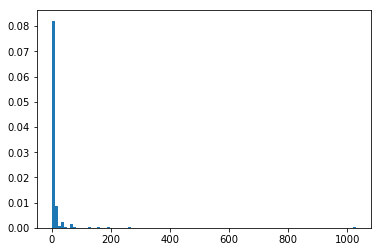

In [63]:
plt.clf()
fig = plt.figure()
ax1 = fig.add_subplot(111)
n, bins, rectangles = ax1.hist(m_values, 100, normed=True)
plt.show()

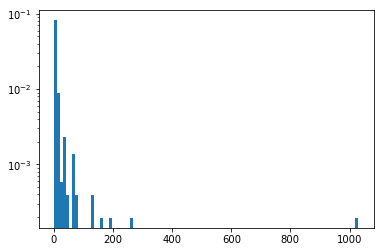

In [64]:
plt.clf()
fig = plt.figure()
ax1 = fig.add_subplot(111)
n, bins, rectangles = ax1.hist(m_values, 100, normed=True, log=True)
plt.show()

## Part c

In [71]:
C = 500
n_0 = 200
alpha_g = 2.0 * 10 ** -9.0
g = 21
M = 3

means = np.array([0, 0, 0])
variances = np.array([0, 0, 0])
stds = np.array([0, 0, 0])

for test_set in range(M):
    m_values = 0 * np.arange(1, C + 1)

    for sample in range(C):
        m_values[sample] = resistant(200, alpha_g, g)
    
    mu = np.mean(m_values)
    var = np.var(m_values) * C / (C - 1)
    means[test_set] = mu
    variances[test_set] = var
    stds[test_set] = np.sqrt(var)

print('means: ' + str(means))
print('variances: ' + str(variances))
print('standard deviations:' + str(stds))

means: [6 9 9]
variances: [ 212 1799 1010]
standard deviations:[14 42 31]


## Part d

In [89]:
C = 500
n_0 = 200
alpha_g = 2.0 * 10 ** -9.0
g = 21

first_gens = 0 * np.arange(1, C + 1)
m_values = 0 * np.arange(1, C + 1)

for sample in range(C):
    f_g, m_v = resistant_with_first_gen(200, alpha_g, g)
    first_gens[sample] = f_g
    m_values[sample] = m_v

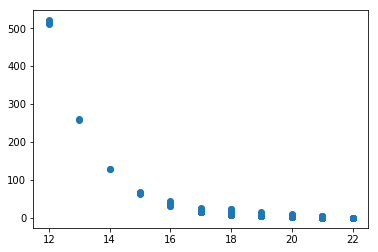

In [90]:
plt.clf()
plt.scatter(first_gens, m_values)

# Problem 5

## Part a

In [109]:
data_23 = np.load('PMLS_LD_Data/LDexpt23.npy')

print(data_23[:, 0].astype(int))
print(data_23[:, 1].astype(int))
print(np.sum(data_23[:, 0]))

#got rid of the last bin since nothing fell into it. 
bins = 0.5 * (data_23[1:, 0] + (data_23[:-1, 0] - 1)) # accounting for nonuniform bin size
pops = data_23[:-1, 1]
print(bins)
data_23[:, 0] * data_23[:, 1]
mean = np.mean(bins * pops)
variance = np.var(bins * pops) * np.sum(pops) / (np.sum(pops) - 1)

print('mean: ' + str(mean))
print('variance: ' + str(variance))
print('standard deviation: ' + str(np.sqrt(variance)))

[   0    1    2    3    4    5    6   11   21   51  101  201  501 1001]
[29 17  4  3  3  2  5  6  7  5  2  4  0  0]
1908.0
[   0.     1.     2.     3.     4.     5.     8.    15.5   35.5   75.5
  150.5  350.5  750.5]
mean: 193.692307692
variance: 138801.050468
standard deviation: 372.560130003


## Part b

In [111]:
data_22 = np.load('PMLS_LD_Data/LDexpt22.npy')

print(data_22[:, 0].astype(int))
print(data_22[:, 1].astype(int))
print(np.sum(data_23[:, 0]))

#got rid of the last bin since nothing fell into it. 
bins = 0.5 * (data_22[1:, 0] + (data_22[:-1, 0] - 1)) # accounting for nonuniform bin size
pops = data_22[:-1, 1]
print(bins)
data_22[:, 0] * data_22[:, 1]
mean = np.mean(bins * pops)
variance = np.var(bins * pops) * np.sum(pops) / (np.sum(pops) - 1)

print('mean: ' + str(mean))
print('variance: ' + str(variance))
print('standard deviation: ' + str(np.sqrt(variance)))

[   0    1    2    3    4    5    6   11   21   51  101  201  501 1001]
[57 20  5  2  3  1  7  2  2  0  0  0  1  0]
1908.0
[   0.     1.     2.     3.     4.     5.     8.    15.5   35.5   75.5
  150.5  350.5  750.5]
mean: 73.9615384615
variance: 39003.8252346
standard deviation: 197.493861258
